In [127]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
# Reading the train dataset.
train =pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [129]:
# Reading test dataset.
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [130]:
train.shape,test.shape # shape of train & test dataset.

((12980, 12), (4399, 11))

In [131]:
train.isnull().sum()  # finding null values.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [132]:
test.isnull().sum() # finding null values.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [133]:
test.dtypes # data type of test dataset.

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [134]:
train.dtypes # data type of train dataset.

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

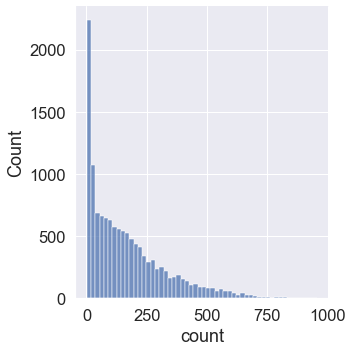

In [135]:
# Plotting displot of 'count'
sns.set_style('darkgrid')
sns.displot(train['count'])

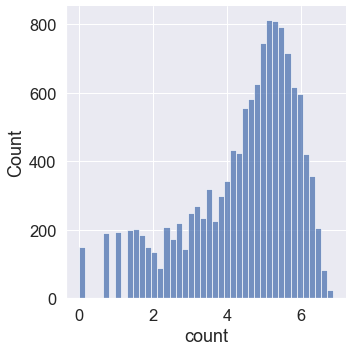

In [136]:
# Plotting displot of log of 'count' variable.
sns.displot(np.log(train['count']))

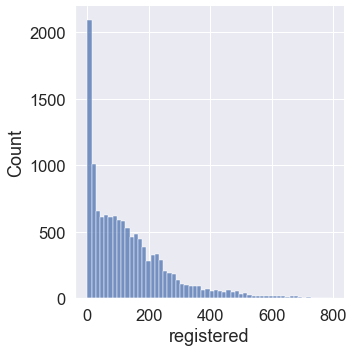

In [137]:
sns.displot(train['registered']) # Plotting displot of 'registered ' variable

<AxesSubplot:>

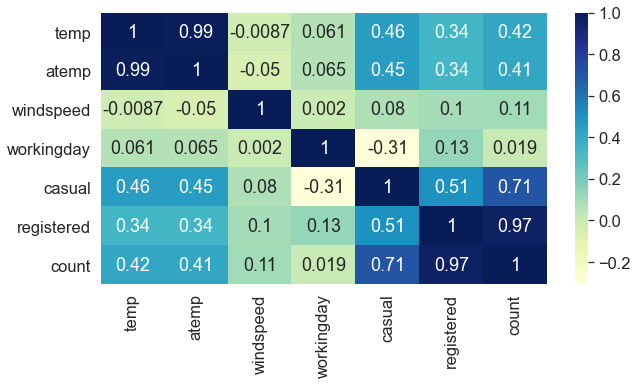

In [138]:
# Plotting heatmap for correlation of variables.
sns.set(font_scale=1.5)
corr =train[['temp','atemp','windspeed','workingday','casual','registered','count']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [139]:
# Removing 'atemp' columns to escape from multi-collinearity.
train =train.drop('atemp',axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0,0.0,0,1,1


In [140]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [141]:
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0,0.0,0,1,1,2011-01-01,4,1


In [142]:
test = test.drop('atemp',axis=1)

In [143]:
# extracting date, hour and month from the datetime
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [144]:
test.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,89.0,11.0014,3,7,2012-06-30,5,6


In [145]:
# droping 'date' & 'datetime' variable columns.
test = test.drop(['date','datetime'],axis=1)
train = train.drop(['date','datetime'],axis=1)

In [146]:
# seperating independent & dependent variable.
x = train.drop('count',axis=1)
y = np.log(train['count'])

In [147]:
from sklearn.model_selection import train_test_split 
# Importing train_test_split

In [148]:
# splitting in train & validation data set.
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.1,random_state=5)

In [149]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape # shape of train & validation datasets.

((11682, 11), (1298, 11), (11682,), (1298,))

#### Model Building

In [150]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression 
lr = LinearRegression()

In [151]:
lr.fit(x_train,y_train) # Fitting model

LinearRegression()

In [152]:
y_pred =lr.predict(x_val) # Predicting x_val.

In [153]:
def rmsle (y,y_):       # Defining new function rmsle to evalute model.
    y = np.exp(y)    
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1-log2)**2
    return np.sqrt(np.mean(calc))

In [154]:
rmsle(y_val,y_pred)

0.7150812658783092

In [165]:
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor.
dt = DecisionTreeRegressor(max_depth=10)       # for maximum depth 10.

In [166]:
dt.fit(x_train,y_train) # fitting model.

DecisionTreeRegressor(max_depth=10)

In [167]:
y_prediction = dt.predict(x_test)     # predicting for x_test

In [168]:
rmsle(y_prediction,y_val)          # rmsle value is less than 0.5 so that model is good enough.

0.02319545913412345

In [169]:
test_prediction = dt.predict(test)

In [170]:
final_prediction = np.exp(test_prediction) # saving in final prediction

In [171]:
submission = pd.DataFrame()  # Creating a new data frame.

In [172]:
submission['count'] = final_prediction

In [173]:
submission.to_csv('target.csv',header=True,index=False) # saving into new CSV file.